<h3> Data dictionary</h3>

|Column|Description|
| ------------- |-------------:|
|PassengerID| A column added by Kaggle to identify each row and make submissions easier|
|Survived | Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)|
|Pclass | The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)|
|Sex | The passenger's sex|
|Age | The passenger's age in years|
|SibSp | The number of siblings or spouses the passenger had aboard the Titanic|
|Parch | The number of parents or children the passenger had aboard the Titanic|
|Ticket | The passenger's ticket number|
|Fare | The fare the passenger paid|
|Cabin | The passenger's cabin number|
|Embarked | The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)|

<h3> Functions </h3>

In [24]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [31]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

<h3> Libraries</h3>

In [36]:
import types
import pandas as pd
import matplotlib.pyplot as plt


! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h3> Connect to the data sets </h3>

In [2]:
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b7f71e9c073546978b74a5417819d508 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='A1lcfsMl23oA6qkSe8Aw3rZxuHaHYep_3CUPzDmXuU2K',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b7f71e9c073546978b74a5417819d508.get_object(Bucket='kaggletitanicmachinelearningfromd-donotdelete-pr-dvnvhnyjt2hwqg',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test.shape

(418, 11)

In [4]:

body = client_b7f71e9c073546978b74a5417819d508.get_object(Bucket='kaggletitanicmachinelearningfromd-donotdelete-pr-dvnvhnyjt2hwqg',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

<h3> Exploratory Analysis </h3>

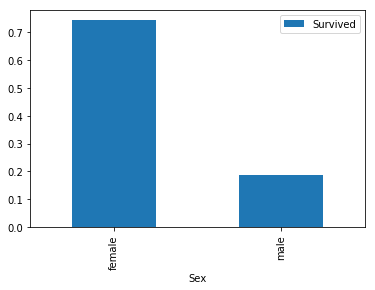

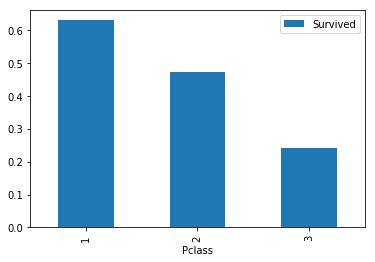

In [30]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
pclass_pivot = train.pivot_table(index="Pclass", values="Survived")

sex_pivot.plot.bar() 
pclass_pivot.plot.bar()

plt.show()

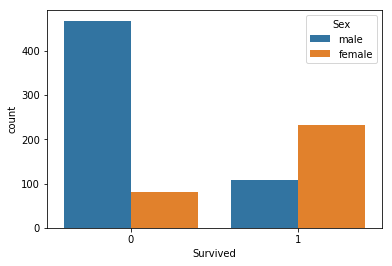

In [44]:
sns.countplot(x='Survived', data=train, hue='Sex')

(0, 1.050640789796419)

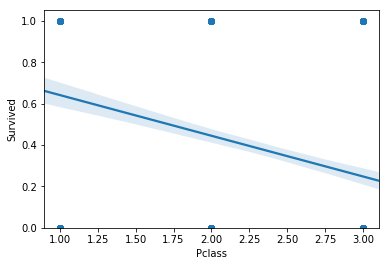

In [40]:
sns.regplot(x="Pclass", y="Survived", data=train)
plt.ylim(0,)

In [21]:
print(train["Age"].describe())
#age>= 0.42 and age <= 80

count    891.000000
mean      23.699966
std       17.731181
min       -0.500000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


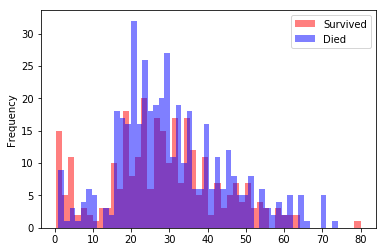

In [19]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [28]:
cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing","Infant","Child", "Teenager", "Young Adult", "Adult", "Senior"]


train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot

,Survived
Age_categories,
Missing,0.293785
Infant,0.704545
Child,0.360000
Teenager,0.428571
Young Adult,0.382682
Adult,0.400000
Senior,0.227273


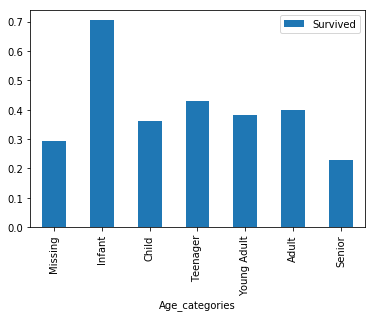

In [29]:
pivot.plot.bar()
plt.show()